In [3]:
import pandas as pd

# Remove truncation for columns
pd.set_option('display.max_columns', None)

# Remove truncation for rows
pd.set_option('display.max_rows', None)

# Set width to display all columns without wrapping
pd.set_option('display.width', None)

# Increase max column width to show full text in columns
pd.set_option('display.max_colwidth', None)
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data.shape

C:\Users\sunc2\AppData\Local\Temp\ipykernel_11956\1192385179.py:15: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


(11431, 1779)

In [4]:
data['DATASET'].value_counts()

DATASET
2022 Cross-Sectional    3916
2021 Cross-Sectional    3589
2023 Cross-Sectional    3058
2022 Cohort              493
2023 Cohort              375
Name: count, dtype: int64

In [5]:
data = data[data['DATASET'] == '2023 Cross-Sectional']

In [6]:
def find_columns_by_keyword_and_dtype(keywords):
    
    # Filter further based on keywords in column names
    filtered_columns = [col for col in data.columns if any(keyword in col for keyword in keywords)]
    
    return filtered_columns

# Example usage
keywords = ['three_factor_eating_questionnaire']  # Replace with your desired keywords
matching_columns_e = find_columns_by_keyword_and_dtype(keywords)
data[matching_columns_e].dtypes

NUTRITION_three_factor_eating_questionnaire_eat_when_smell_food                   object
NUTRITION_three_factor_eating_questionnaire_small_helpings_for_weight_control     object
NUTRITION_three_factor_eating_questionnaire_eat_when_anxious                      object
NUTRITION_three_factor_eating_questionnaire_uncontrolled_eating_episodes          object
NUTRITION_three_factor_eating_questionnaire_influenced_eating_by_others           object
NUTRITION_three_factor_eating_questionnaire_overeat_when_sad                      object
NUTRITION_three_factor_eating_questionnaire_immediate_eating_when_see_delicacy    object
NUTRITION_three_factor_eating_questionnaire_bottomless_pit_feeling                object
NUTRITION_three_factor_eating_questionnaire_always_hungry_cant_stop               object
NUTRITION_three_factor_eating_questionnaire_eat_when_lonely                       object
NUTRITION_three_factor_eating_questionnaire_hold_back_to_avoid_weight_gain        object
NUTRITION_three_facto

In [7]:
# Step 1: Remove rows with missing values in the questionnaire columns directly in 'data'
data = data.dropna(subset=matching_columns_e)


# Output the shape of the updated dataset to confirm the number of rows retained
print(f"Data shape after pruning: {data.shape}")

# Verify the updated dataset
print(data[matching_columns_e].info())
data[matching_columns_e].head()

Data shape after pruning: (285, 1779)
<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 35 to 11426
Data columns (total 18 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   NUTRITION_three_factor_eating_questionnaire_eat_when_smell_food                 285 non-null    object
 1   NUTRITION_three_factor_eating_questionnaire_small_helpings_for_weight_control   285 non-null    object
 2   NUTRITION_three_factor_eating_questionnaire_eat_when_anxious                    285 non-null    object
 3   NUTRITION_three_factor_eating_questionnaire_uncontrolled_eating_episodes        285 non-null    object
 4   NUTRITION_three_factor_eating_questionnaire_influenced_eating_by_others         285 non-null    object
 5   NUTRITION_three_factor_eating_questionnaire_overeat_when_sad                    285 non-null    ob

,NUTRITION_three_factor_eating_questionnaire_eat_when_smell_food,NUTRITION_three_factor_eating_questionnaire_small_helpings_for_weight_control,NUTRITION_three_factor_eating_questionnaire_eat_when_anxious,NUTRITION_three_factor_eating_questionnaire_uncontrolled_eating_episodes,NUTRITION_three_factor_eating_questionnaire_influenced_eating_by_others,NUTRITION_three_factor_eating_questionnaire_overeat_when_sad,NUTRITION_three_factor_eating_questionnaire_immediate_eating_when_see_delicacy,NUTRITION_three_factor_eating_questionnaire_bottomless_pit_feeling,NUTRITION_three_factor_eating_questionnaire_always_hungry_cant_stop,NUTRITION_three_factor_eating_questionnaire_eat_when_lonely,NUTRITION_three_factor_eating_questionnaire_hold_back_to_avoid_weight_gain,NUTRITION_three_factor_eating_questionnaire_avoid_fattening_foods,NUTRITION_three_factor_eating_questionnaire_always_hungry_for_any_time,NUTRITION_three_factor_eating_questionnaire_frequency_of_hunger,NUTRITION_three_factor_eating_questionnaire_avoid_tempting_foods_stocking,NUTRITION_three_factor_eating_questionnaire_conscious_eating_restraint,NUTRITION_three_factor_eating_questionnaire_binge_eating_when_not_hungry,NUTRITION_three_factor_eating_questionnaire_restraint_scale_rating
35,Mostly true,Mostly true,Definitely true,Definitely true,Mostly true,Definitely true,Mostly true,Mostly true,Mostly false,Mostly true,Definitely false,Definitely false,Mostly true,Often between meals,Usually,Slightly likely,Sometimes,3.0
92,Definitely true,Mostly true,Definitely true,Definitely true,Mostly false,Mostly true,Mostly false,Mostly true,Definitely true,Mostly true,Mostly true,Mostly true,Mostly true,Often between meals,Almost always,Moderately likely,Never,4.0
101,Mostly false,Definitely false,Definitely true,Mostly true,Mostly true,Definitely true,Definitely true,Definitely false,Definitely false,Mostly false,Definitely false,Definitely false,Definitely false,Sometimes between meals,Almost never,Unlikely,Never,2.0
131,Mostly false,Definitely false,Definitely false,Definitely false,Mostly false,Definitely false,Mostly false,Definitely false,Definitely false,Definitely false,Mostly false,Definitely false,Definitely false,Sometimes between meals,Seldom,Slightly likely,Never,5.0
217,Mostly true,Definitely false,Definitely false,Mostly false,Definitely true,Mostly false,Definitely true,Mostly false,Definitely false,Definitely false,Definitely false,Definitely false,Mostly false,Sometimes between meals,Usually,Slightly likely,Sometimes,2.0


### Scoring the Three-Factor Eating Questionnaire (TFEQ-18) [Source](https://www.med.umich.edu/pdf/weight-management/TFEQ-r18.pdf)

The **Three-Factor Eating Questionnaire (TFEQ-18)** is a widely used self-report measure designed to assess eating behavior patterns across three main factors:

1. **Cognitive Restraint (CR)**  
   Measures conscious control over food intake, often to control body weight or shape.

2. **Uncontrolled Eating (UE)**  
   Reflects a tendency to lose control over eating when feeling hungry or when exposed to food stimuli.

3. **Emotional Eating (EE)**  
   Captures the tendency to eat in response to emotional states, such as anxiety, sadness, or loneliness.

---

#### Scoring Process
Each of the three factors is calculated by summing up responses to specific items in the questionnaire. The responses are typically on a Likert scale, which is transformed into numerical values for scoring.

---

#### Response to Numerical Mapping
Responses are mapped to numerical values as follows:

| **Response**            | **Score** |
|--------------------------|-----------|
| Definitely false         | 1         |
| Mostly false             | 2         |
| Mostly true              | 3         |
| Definitely true          | 4         |
| Only at meal times       | 1         |
| Sometimes between meals  | 2         |
| Often between meals      | 3         |
| Almost always            | 4         |
| Never                    | 1         |
| Rarely                   | 2         |
| Sometimes                | 3         |
| At least once a week     | 4         |
| Unlikely                 | 1         |
| Slightly likely          | 2         |
| Moderately likely        | 3         |
| Very likely              | 4         |

---

#### Item Mapping to Factors
The items are divided across the three factors as follows:

1. **Cognitive Restraint (CR):**
   - Small helpings for weight control
   - Hold back to avoid weight gain
   - Avoid fattening foods
   - Avoid stocking tempting foods
   - Conscious eating restraint
   - Restraint scale rating

2. **Uncontrolled Eating (UE):**
   - Uncontrolled eating episodes
   - Influenced eating by others
   - Immediate eating when seeing delicacies
   - Bottomless pit feeling
   - Always hungry and can’t stop
   - Always hungry at any time
   - Frequency of hunger
   - Binge eating when not hungry

3. **Emotional Eating (EE):**
   - Eat when smelling food
   - Eat when anxious
   - Overeat when sad
   - Eat when lonely

---

#### Calculating Factor Scores
1. **Score each item** by mapping responses to their numerical values.
2. **Sum the scores** for all items within each factor to calculate the factor’s total score:

\[
\text{Factor Score} = \sum (\text{Numerical Values of Items in Factor})
\]

For example:
- If the CR factor includes 6 items and a respondent scores 3, 4, 3, 2, 4, and 3 on these items, the total CR score would be:  
  3 + 4 + 3 + 2 + 4 + 3 = 19

---

#### Scaling Factor Scores
To make the factor scores easier to understand and compare, we scale them to a 0-100 range using the following formula:

\[
\text{Scaled Score} = \left( \frac{\text{Your Score} - \text{Minimum Score}}{\text{Maximum Score} - \text{Minimum Score}} \right) \times 100
\]

- **Minimum Score:** When every item is scored as 1.
- **Maximum Score:** When every item is scored as 4.

**Steps to Scale Each Factor:**

1. **Cognitive Restraint (CR):**
   - **Number of Items:** 6
   - **Minimum Score:** \(1 \times 6 = 6\)
   - **Maximum Score:** \(4 \times 6 = 24\)
   - **Scaling Formula:**  
     \[
     \text{CR Scaled} = \left( \frac{\text{CR Score} - 6}{24 - 6} \right) \times 100
     \]

2. **Uncontrolled Eating (UE):**
   - **Number of Items:** 8
   - **Minimum Score:** \(1 \times 8 = 8\)
   - **Maximum Score:** \(4 \times 8 = 32\)
   - **Scaling Formula:**  
     \[
     \text{UE Scaled} = \left( \frac{\text{UE Score} - 8}{32 - 8} \right) \times 100
     \]

3. **Emotional Eating (EE):**
   - **Number of Items:** 4
   - **Minimum Score:** \(1 \times 4 = 4\)
   - **Maximum Score:** \(4 \times 4 = 16\)
   - **Scaling Formula:**  
     \[
     \text{EE Scaled} = \left( \frac{\text{EE Score} - 4}{16 - 4} \right) \times 100
     \]

**Example of Scaled Score Calculation:**
- For **Cognitive Restraint (CR)**:
  - Original CR Score: 19
  - Scaled CR Score:  
    \[
    \left( \frac{19 - 6}{24 - 6} \right) \times 100 \approx 72.22
    \]

---

#### Interpreting the Scores
- **Higher scores** indicate a stronger presence of the specific eating behavior.
  - **CR:** More conscious restraint over eating.
  - **UE:** Higher tendency toward losing control over eating.
  - **EE:** Greater emotional influence on eating behaviors.

These scaled scores can then be used as dependent variables in regression models or other analyses to explore their relationships with predictors such as personality traits, health behaviors, or social influences.

---



In [8]:
def find_columns_by_keyword_and_dtype(keywords):
    
    # Filter further based on keywords in column names
    filtered_columns = [col for col in data.columns if any(keyword in col for keyword in keywords)]
    
    return filtered_columns

# Example usage
keywords = ['score']  # Replace with your desired keywords
matching_columns_n = find_columns_by_keyword_and_dtype(keywords)
data[matching_columns_n].dtypes

PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored            object
PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored             object
PSYCH_cope_60_positive_reinterpretation_and_growth_subscale_score               float64
PSYCH_cope_60_mental_disengagement_subscale_score                               float64
PSYCH_cope_60_focus_on_and_venting_of_emotions_subscale_score                   float64
PSYCH_cope_60_use_of_instrumental_social_support_subscale_score                 float64
PSYCH_cope_60_active_coping_subscale_score                                      float64
PSYCH_cope_60_denial_subscale_score                                             float64
PSYCH_cope_60_religious_coping_subscale_score                                   float64
PSYCH_cope_60_humor_subscale_score                                              float64
PSYCH_cope_60_behavioral_disengagement_subscale_score                           float64
PSYCH_cope_60_restraint_subscale

In [9]:
# Step 4: Check for missing responses in predictor variables
missing_data_summary = data[matching_columns_n].isnull().sum()

# Filter variables with more than 50 missing responses
missing_predictors = missing_data_summary[missing_data_summary > 50]

# Output results
print("Predictor variables with more than 50 missing responses:")
print(missing_predictors)

# Retain valid predictors (allowing up to 50 missing responses)
valid_predictors = [col for col in matching_columns_n if col not in missing_predictors.index]

print("\nValid predictors for regression (allowing up to 50 missing responses):")
data[valid_predictors].dtypes




Predictor variables with more than 50 missing responses:
PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored           285
PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored            285
PSYCH_cope_60_positive_reinterpretation_and_growth_subscale_score               285
PSYCH_cope_60_mental_disengagement_subscale_score                               285
PSYCH_cope_60_focus_on_and_venting_of_emotions_subscale_score                   285
PSYCH_cope_60_use_of_instrumental_social_support_subscale_score                 285
PSYCH_cope_60_active_coping_subscale_score                                      285
PSYCH_cope_60_denial_subscale_score                                             285
PSYCH_cope_60_religious_coping_subscale_score                                   285
PSYCH_cope_60_humor_subscale_score                                              285
PSYCH_cope_60_behavioral_disengagement_subscale_score                           285
PSYCH_cope_60_restr

HEALTH_hampson_good_health_practices_scale_score                           float64
NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score    float64
NUTRITION_cooking_and_food_provisioning_action_scale_attitude_score        float64
NUTRITION_cooking_and_food_provisioning_action_scale_structure_score       float64
LONELY_dejong_emotional_social_loneliness_scale_score                      float64
LONELY_dejong_emotional_loneliness_sub_scale_score                         float64
LONELY_dejong_social_loneliness_sub_scale_score                            float64
LONELY_dejong_emotional_social_loneliness_scale_score_y_n                   object
LONELY_dejong_emotional_loneliness_sub_scale_score_y_n                      object
LONELY_dejong_social_loneliness_sub_scale_score_y_n                         object
WELLNESS_phq_score                                                         float64
WELLNESS_phq_score_y_n                                                      object
WELL

In [10]:
valid_predictors

['HEALTH_hampson_good_health_practices_scale_score',
 'NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score',
 'NUTRITION_cooking_and_food_provisioning_action_scale_attitude_score',
 'NUTRITION_cooking_and_food_provisioning_action_scale_structure_score',
 'LONELY_dejong_emotional_social_loneliness_scale_score',
 'LONELY_dejong_emotional_loneliness_sub_scale_score',
 'LONELY_dejong_social_loneliness_sub_scale_score',
 'LONELY_dejong_emotional_social_loneliness_scale_score_y_n',
 'LONELY_dejong_emotional_loneliness_sub_scale_score_y_n',
 'LONELY_dejong_social_loneliness_sub_scale_score_y_n',
 'WELLNESS_phq_score',
 'WELLNESS_phq_score_y_n',
 'WELLNESS_gad_score',
 'WELLNESS_gad_score_y_n',
 'PSYCH_social_interactions_anxiety_scale_score',
 'PSYCH_social_interactions_anxiety_scale_score_y_n',
 'PSYCH_social_phobia_scale_score',
 'PSYCH_social_phobia_scale_score_y_n',
 'PSYCH_rosenberg_self_esteem_score',
 'PSYCH_rosenberg_self_esteem_score_y_n',
 'PSYCH_big_five_invento

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Step 5: Score the TFEQ-18 Questionnaire
# Define factor columns
cognitive_restraint_columns = [
    'NUTRITION_three_factor_eating_questionnaire_small_helpings_for_weight_control',
    'NUTRITION_three_factor_eating_questionnaire_hold_back_to_avoid_weight_gain',
    'NUTRITION_three_factor_eating_questionnaire_avoid_fattening_foods',
    'NUTRITION_three_factor_eating_questionnaire_avoid_tempting_foods_stocking',
    'NUTRITION_three_factor_eating_questionnaire_conscious_eating_restraint',
    'NUTRITION_three_factor_eating_questionnaire_restraint_scale_rating'
]

uncontrolled_eating_columns = [
    'NUTRITION_three_factor_eating_questionnaire_uncontrolled_eating_episodes',
    'NUTRITION_three_factor_eating_questionnaire_influenced_eating_by_others',
    'NUTRITION_three_factor_eating_questionnaire_immediate_eating_when_see_delicacy',
    'NUTRITION_three_factor_eating_questionnaire_bottomless_pit_feeling',
    'NUTRITION_three_factor_eating_questionnaire_always_hungry_cant_stop',
    'NUTRITION_three_factor_eating_questionnaire_always_hungry_for_any_time',
    'NUTRITION_three_factor_eating_questionnaire_frequency_of_hunger',
    'NUTRITION_three_factor_eating_questionnaire_binge_eating_when_not_hungry'
]

emotional_eating_columns = [
    'NUTRITION_three_factor_eating_questionnaire_eat_when_smell_food',
    'NUTRITION_three_factor_eating_questionnaire_eat_when_anxious',
    'NUTRITION_three_factor_eating_questionnaire_overeat_when_sad',
    'NUTRITION_three_factor_eating_questionnaire_eat_when_lonely'
]

# Assign scores to Likert responses
def assign_scores(row):
    mapping = {
        "Definitely false": 1,
        "Mostly false": 2,
        "Mostly true": 3,
        "Definitely true": 4,
        "Only at meal times": 1,
        "Sometimes between meals": 2,
        "Often between meals": 3,
        "Almost always": 4,
        "Never": 1,
        "Rarely": 2,
        "Sometimes": 3,
        "At least once a week": 4,
        "Unlikely": 1,
        "Slightly likely": 2,
        "Moderately likely": 3,
        "Very likely": 4
    }
    return mapping.get(row, 0)

# Create new mapped columns
for col in cognitive_restraint_columns + uncontrolled_eating_columns + emotional_eating_columns:
    mapped_col = f"Mapped_{col}"
    data[mapped_col] = data[col].apply(assign_scores)

# Calculate factor scores using the new mapped columns
mapped_cognitive_restraint_columns = [f"Mapped_{col}" for col in cognitive_restraint_columns]
mapped_uncontrolled_eating_columns = [f"Mapped_{col}" for col in uncontrolled_eating_columns]
mapped_emotional_eating_columns = [f"Mapped_{col}" for col in emotional_eating_columns]

data['Cognitive_Restraint'] = data[mapped_cognitive_restraint_columns].sum(axis=1)
data['Uncontrolled_Eating'] = data[mapped_uncontrolled_eating_columns].sum(axis=1)
data['Emotional_Eating'] = data[mapped_emotional_eating_columns].sum(axis=1)

# Step 6: Scale the factor scores between 0 and 100
# Define the number of questions per factor
num_cognitive = len(cognitive_restraint_columns)          # 6 questions
num_uncontrolled = len(uncontrolled_eating_columns)      # 8 questions
num_emotional = len(emotional_eating_columns)            # 4 questions

# Calculate minimum and maximum scores for each factor
min_cognitive = 1 * num_cognitive
max_cognitive = 4 * num_cognitive

min_uncontrolled = 1 * num_uncontrolled
max_uncontrolled = 4 * num_uncontrolled

min_emotional = 1 * num_emotional
max_emotional = 4 * num_emotional

# Apply normalization formula
data['Cognitive_Restraint_Scaled'] = ((data['Cognitive_Restraint'] - min_cognitive) / (max_cognitive - min_cognitive)) * 100
data['Uncontrolled_Eating_Scaled'] = ((data['Uncontrolled_Eating'] - min_uncontrolled) / (max_uncontrolled - min_uncontrolled)) * 100
data['Emotional_Eating_Scaled'] = ((data['Emotional_Eating'] - min_emotional) / (max_emotional - min_emotional)) * 100

# Optional: If you prefer to overwrite the original factor scores with scaled scores, uncomment the following lines:
# data['Cognitive_Restraint'] = data['Cognitive_Restraint_Scaled']
# data['Uncontrolled_Eating'] = data['Uncontrolled_Eating_Scaled']
# data['Emotional_Eating'] = data['Emotional_Eating_Scaled']
# data.drop(['Cognitive_Restraint_Scaled', 'Uncontrolled_Eating_Scaled', 'Emotional_Eating_Scaled'], axis=1, inplace=True)


# Step 2: Filter the data to include only rows without missing values for the valid predictors and dependent variables
required_columns = valid_predictors + ['Cognitive_Restraint', 'Uncontrolled_Eating', 'Emotional_Eating']
data_cleaned = data.dropna(subset=required_columns)

# Confirm the shape of the cleaned dataset
print(f"Data shape after cleaning: {data_cleaned.shape}")


Data shape after cleaning: (233, 1803)


In [12]:
selected_predictors_cr = [
    "HEALTH_hampson_good_health_practices_scale_score",
    "NUTRITION_cooking_and_food_provisioning_action_scale_attitude_score",
    "LONELY_dejong_social_loneliness_sub_scale_score",#supressor variable for emotional_loneliness_sub_scale?
    "LONELY_dejong_emotional_loneliness_sub_scale_score",
    "C(PSYCH_social_phobia_scale_score_y_n)",                        # Categorical predictor
]


formula_cr = f"Cognitive_Restraint_Scaled ~ {' + '.join(selected_predictors_cr)}"
model_cr = smf.ols(formula=formula_cr, data=data_cleaned).fit()
model_cr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Cognitive_Restraint_Scaled   R-squared:                       0.150
Model:                                    OLS   Adj. R-squared:                  0.132
Method:                         Least Squares   F-statistic:                     8.040
Date:                        Thu, 28 Nov 2024   Prob (F-statistic):           5.33e-07
Time:                                12:15:16   Log-Likelihood:                -999.69
No. Observations:                         233   AIC:                             2011.
Df Residuals:                             227   BIC:                             2032.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              -7.5996      9.181     -0.828      0.409     -25.691      10.492
C(PSYCH_social_phobia_scale_score_y_n)[T.Yes (6-24)]                   -6.6852      2.855     -2.341      0.020     -12.311      -1.059
HEALTH_hampson_good_health_practices_scale_score                       10.1735      2.211      4.601      0.000       5.817      14.530
NUTRITION_cooking_and_food_provisioning_action_scale_attitude_score    -3.1171      1.000     -3.116      0.002      -5.088      -1.146
LONELY_dejong_social_loneliness_sub_scale_score                        -1.1977      1.160     -1.032      0.303      -3.483       1.088
LONELY_dejong_emotional_loneliness_sub_scale_score                      2.6545      1.189      2.233      0.026       0.313       4.997
==============================================================================
Omnibus:                       20.690   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.449
Skew:                           0.732   Prob(JB):                     8.09e-06
Kurtosis:                       3.522   Cond. No.                         51.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
selected_predictors_ue = [
    "HEALTH_hampson_good_health_practices_scale_score",
    "NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score",
    "NUTRITION_cooking_and_food_provisioning_action_scale_structure_score",
    "LONELY_dejong_emotional_social_loneliness_scale_score",
    "PSYCH_big_five_inventory_conscientious_score",
    "PSYCH_big_five_inventory_open_score",
]

formula_ue = f"Uncontrolled_Eating_Scaled ~ {' + '.join(selected_predictors_ue)}"
model_ue = smf.ols(formula=formula_ue, data=data_cleaned).fit()
model_ue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Uncontrolled_Eating_Scaled   R-squared:                       0.232
Model:                                    OLS   Adj. R-squared:                  0.212
Method:                         Least Squares   F-statistic:                     11.39
Date:                        Thu, 28 Nov 2024   Prob (F-statistic):           4.01e-11
Time:                                12:15:16   Log-Likelihood:                -1000.6
No. Observations:                         233   AIC:                             2015.
Df Residuals:                             226   BIC:                             2039.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  88.5678     11.260      7.866      0.000      66.379     110.756
HEALTH_hampson_good_health_practices_scale_score                           -5.7633      2.440     -2.362      0.019     -10.570      -0.956
NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score     2.6059      1.241      2.100      0.037       0.160       5.052
NUTRITION_cooking_and_food_provisioning_action_scale_structure_score       -3.7933      0.879     -4.313      0.000      -5.526      -2.060
LONELY_dejong_emotional_social_loneliness_scale_score                       1.9895      0.639      3.112      0.002       0.730       3.249
PSYCH_big_five_inventory_conscientious_score                               -0.6243      0.207     -3.017      0.003      -1.032      -0.217
PSYCH_big_five_inventory_open_score                                        -0.4301      0.190     -2.269      0.024      -0.804      -0.057
==============================================================================
Omnibus:                        4.337   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.073
Skew:                           0.319   Prob(JB):                        0.130
Kurtosis:                       3.113   Cond. No.                         498.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
selected_predictors_ee = [
    "NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score",
    "NUTRITION_cooking_and_food_provisioning_action_scale_structure_score",
    "PSYCH_social_phobia_scale_score",
    #Supresses C(anxiety_scale_score_y_n) and C(phobia_scale_score_y_n),C(LONELY_dejong_emotional_loneliness_sub_scale)
    #but DECREASES NUTRITION structure, selfefficacy significance
    "PSYCH_big_five_inventory_conscientious_score",
    "PSYCH_big_five_inventory_neurotic_score",
    "PSYCH_social_interactions_anxiety_scale_score",#Supressor variable? for C(anxiety_scale_score_y_n) and C(phobia_scale_score_y_n)
    "C(LONELY_dejong_emotional_loneliness_sub_scale_score_y_n)",     # Categorical predictor
    "C(PSYCH_social_interactions_anxiety_scale_score_y_n)",          # Categorical predictor
    "C(PSYCH_social_phobia_scale_score_y_n)",                        # Categorical predictor
]

formula_ee = f"Emotional_Eating_Scaled ~ {' + '.join(selected_predictors_ee)}"
model_ee = smf.ols(formula=formula_ee, data=data_cleaned).fit()
model_ee.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Emotional_Eating_Scaled   R-squared:                       0.221
Model:                                 OLS   Adj. R-squared:                  0.189
Method:                      Least Squares   F-statistic:                     7.017
Date:                     Thu, 28 Nov 2024   Prob (F-statistic):           6.42e-09
Time:                             12:15:16   Log-Likelihood:                -1081.3
No. Observations:                      233   AIC:                             2183.
Df Residuals:                          223   BIC:                             2217.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  30.2168     16.100      1.877      0.062      -1.510      61.944
C(LONELY_dejong_emotional_loneliness_sub_scale_score_y_n)[T.Yes (1-3)]     10.0821      4.370      2.307      0.022       1.470      18.694
C(PSYCH_social_interactions_anxiety_scale_score_y_n)[T.Yes (7-24)]        -12.8367      6.557     -1.958      0.052     -25.758       0.085
C(PSYCH_social_phobia_scale_score_y_n)[T.Yes (6-24)]                       13.9284      6.735      2.068      0.040       0.655      27.202
NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score     3.4678      1.773      1.956      0.052      -0.027       6.962
NUTRITION_cooking_and_food_provisioning_action_scale_structure_score       -3.0157      1.262     -2.389      0.018      -5.503      -0.528
PSYCH_social_phobia_scale_score                                            -1.0986      0.640     -1.715      0.088      -2.361       0.164
PSYCH_big_five_inventory_conscientious_score                               -0.7723      0.286     -2.702      0.007      -1.336      -0.209
PSYCH_big_five_inventory_neurotic_score                                     1.0177      0.292      3.482      0.001       0.442       1.594
PSYCH_social_interactions_anxiety_scale_score                               1.0728      0.644      1.666      0.097      -0.196       2.341
==============================================================================
Omnibus:                        7.528   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                3.920
Skew:                          -0.012   Prob(JB):                        0.141
Kurtosis:                       2.365   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Check for NaN in predictors
missing_predictors_check = data[valid_predictors].isnull().sum()

print("Missing values in predictors:")
print(missing_predictors_check)

# If there are missing values, summarize them
if missing_predictors_check.sum() > 0:
    print("\nVariables with missing values:")
    print(missing_predictors_check[missing_predictors_check > 0])
else:
    print("\nNo missing values found in predictors.")


Missing values in predictors:
HEALTH_hampson_good_health_practices_scale_score                            7
NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score    12
NUTRITION_cooking_and_food_provisioning_action_scale_attitude_score         4
NUTRITION_cooking_and_food_provisioning_action_scale_structure_score        3
LONELY_dejong_emotional_social_loneliness_scale_score                       3
LONELY_dejong_emotional_loneliness_sub_scale_score                          2
LONELY_dejong_social_loneliness_sub_scale_score                             1
LONELY_dejong_emotional_social_loneliness_scale_score_y_n                   3
LONELY_dejong_emotional_loneliness_sub_scale_score_y_n                      2
LONELY_dejong_social_loneliness_sub_scale_score_y_n                         1
WELLNESS_phq_score                                                          4
WELLNESS_phq_score_y_n                                                      4
WELLNESS_gad_score                

In [16]:
import pandas as pd

# Setting pandas display options to avoid truncation
pd.set_option('display.max_colwidth', None)

# Function to filter by new_var and display text and dataset columns
def get_var_details(var_name):
    # Filter the DataFrame for the specified new_var
    filtered_data = cols[cols['new_var'] == var_name]
    
    # Check if the variable exists in the dataset
    if not filtered_data.empty:
        # Select only the new_var, text, and dataset columns
        result = filtered_data[['new_var', 'text', 'dataset']]
        # Format the output as a single string
        formatted_result = ""
        for _, row in result.iterrows():
            formatted_result += f"new_var: {row['new_var']} | text: {row['text']} | dataset: {row['dataset']}\n"
        return formatted_result.strip()  # Return without the trailing newline
    else:
        return "Variable not found."

# Example usage
print(get_var_details("NUTRITION_three_factor_eating_questionnaire_small_helpings_for_weight_control"))

new_var: NUTRITION_three_factor_eating_questionnaire_small_helpings_for_weight_control | text: Please read each statement and select from the multiple choice options the answer that indicates the frequency with which you  find yourself feeling or experiencing what is being described in the statements below. - I deliberately take small helpings as a means of controlling my weight. | dataset: 2023_cross


In [17]:
data_cleaned_copy = data_cleaned.copy()
data_cleaned_copy.NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score.value_counts()

NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score
6.846154    11
6.538462    10
6.230769    10
5.538462    10
5.461538     9
5.769231     9
6.000000     9
5.846154     8
7.000000     8
6.307692     8
5.153846     8
6.384615     7
6.076923     7
5.923077     6
4.846154     6
5.230769     6
5.615385     5
6.615385     5
6.923077     5
6.461538     5
4.461538     4
4.923077     4
4.230769     4
5.692308     4
5.000000     4
3.692308     3
4.615385     3
4.384615     3
5.307692     3
6.692308     3
4.692308     3
3.923077     3
5.384615     3
4.000000     3
4.769231     3
6.153846     3
6.769231     3
5.076923     2
4.307692     2
4.076923     2
3.538462     2
3.615385     2
3.846154     2
2.692308     1
3.384615     1
2.461538     1
3.769231     1
3.230769     1
2.846154     1
2.923077     1
3.000000     1
1.769231     1
1.538462     1
4.538462     1
1.461538     1
2.230769     1
Name: count, dtype: int64

In [18]:
# data_copy.loc[data_copy.NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score == 1.461538, 1.230769] = 1
# data_copy.loc[data_copy.NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score == 2.230769, 2.461538, 1.769231, 1.538462] = 2
# data_copy.loc[data_copy.NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score == 2.923077, 2.461538, ]

for idx in data_cleaned_copy.index:  # Use the DataFrame's index
    value = data_cleaned_copy.loc[idx, 'NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score']
    if value < 1.5: 
        data_cleaned_copy.loc[idx, 'NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score'] = 1
    elif value < 2.5: 
        data_cleaned_copy.loc[idx, 'NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score'] = 2
    elif value < 3.5: 
        data_cleaned_copy.loc[idx, 'NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score'] = 3
    elif value < 4.5: 
        data_cleaned_copy.loc[idx, 'NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score'] = 4
    elif value < 5.5: 
        data_cleaned_copy.loc[idx, 'NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score'] = 5
    elif value < 6.5: 
        data_cleaned_copy.loc[idx, 'NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score'] = 6
    elif value < 7.5: 
        data_cleaned_copy.loc[idx, 'NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score'] = 7

data_cleaned_copy.NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score.value_counts()

NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score
6.0    91
5.0    55
7.0    45
4.0    31
3.0     6
2.0     4
1.0     1
Name: count, dtype: int64

In [19]:
selected_predictors_ee = [
    # "NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score",
    "NUTRITION_cooking_and_food_provisioning_action_scale_structure_score",
    "PSYCH_social_phobia_scale_score",
    #Supresses C(anxiety_scale_score_y_n) and C(phobia_scale_score_y_n),C(LONELY_dejong_emotional_loneliness_sub_scale)
    #but DECREASES NUTRITION structure, selfefficacy significance
    "PSYCH_big_five_inventory_conscientious_score",
    "PSYCH_big_five_inventory_neurotic_score",
    "PSYCH_social_interactions_anxiety_scale_score",#Supressor variable? for C(anxiety_scale_score_y_n) and C(phobia_scale_score_y_n)
    "C(LONELY_dejong_emotional_loneliness_sub_scale_score_y_n)",     # Categorical predictor
    "C(PSYCH_social_interactions_anxiety_scale_score_y_n)",          # Categorical predictor
    "C(PSYCH_social_phobia_scale_score_y_n)",                        # Categorical predictor
]

formula_ee = f"Emotional_Eating_Scaled ~ {' + '.join(selected_predictors_ee)}"
model_ee = smf.ols(formula=formula_ee, data=data_cleaned_copy).fit()
model_ee.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Emotional_Eating_Scaled   R-squared:                       0.207
Model:                                 OLS   Adj. R-squared:                  0.179
Method:                      Least Squares   F-statistic:                     7.324
Date:                     Thu, 28 Nov 2024   Prob (F-statistic):           1.22e-08
Time:                             12:15:16   Log-Likelihood:                -1083.2
No. Observations:                      233   AIC:                             2184.
Df Residuals:                          224   BIC:                             2216.
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 45.8904     14.051      3.266      0.001      18.202      73.579
C(LONELY_dejong_emotional_loneliness_sub_scale_score_y_n)[T.Yes (1-3)]    10.6187      4.389      2.419      0.016       1.970      19.267
C(PSYCH_social_interactions_anxiety_scale_score_y_n)[T.Yes (7-24)]       -12.7954      6.598     -1.939      0.054     -25.798       0.207
C(PSYCH_social_phobia_scale_score_y_n)[T.Yes (6-24)]                      14.5668      6.770      2.152      0.032       1.226      27.908
NUTRITION_cooking_and_food_provisioning_action_scale_structure_score      -2.7901      1.265     -2.206      0.028      -5.283      -0.297
PSYCH_social_phobia_scale_score                                           -1.2459      0.640     -1.947      0.053      -2.507       0.015
PSYCH_big_five_inventory_conscientious_score                              -0.6269      0.278     -2.257      0.025      -1.174      -0.080
PSYCH_big_five_inventory_neurotic_score                                    0.9571      0.292      3.273      0.001       0.381       1.533
PSYCH_social_interactions_anxiety_scale_score                              0.9428      0.644      1.463      0.145      -0.327       2.213
==============================================================================
Omnibus:                       10.055   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                4.760
Skew:                          -0.055   Prob(JB):                       0.0925
Kurtosis:                       2.309   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
selected_predictors_ee = [
    "NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score",
    "NUTRITION_cooking_and_food_provisioning_action_scale_structure_score",
    "PSYCH_social_phobia_scale_score",
    #Supresses C(anxiety_scale_score_y_n) and C(phobia_scale_score_y_n),C(LONELY_dejong_emotional_loneliness_sub_scale)
    #but DECREASES NUTRITION structure, selfefficacy significance
    "PSYCH_big_five_inventory_conscientious_score",
    "PSYCH_big_five_inventory_neurotic_score",
    "PSYCH_social_interactions_anxiety_scale_score",#Supressor variable? for C(anxiety_scale_score_y_n) and C(phobia_scale_score_y_n)
    "C(LONELY_dejong_emotional_loneliness_sub_scale_score_y_n)",     # Categorical predictor
    "C(PSYCH_social_interactions_anxiety_scale_score_y_n)",          # Categorical predictor
    "C(PSYCH_social_phobia_scale_score_y_n)",                        # Categorical predictor
]

formula_ee = f"Emotional_Eating_Scaled ~ {' + '.join(selected_predictors_ee)}"
model_ee = smf.ols(formula=formula_ee, data=data_cleaned).fit()
model_ee.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Emotional_Eating_Scaled   R-squared:                       0.221
Model:                                 OLS   Adj. R-squared:                  0.189
Method:                      Least Squares   F-statistic:                     7.017
Date:                     Thu, 28 Nov 2024   Prob (F-statistic):           6.42e-09
Time:                             12:19:12   Log-Likelihood:                -1081.3
No. Observations:                      233   AIC:                             2183.
Df Residuals:                          223   BIC:                             2217.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  30.2168     16.100      1.877      0.062      -1.510      61.944
C(LONELY_dejong_emotional_loneliness_sub_scale_score_y_n)[T.Yes (1-3)]     10.0821      4.370      2.307      0.022       1.470      18.694
C(PSYCH_social_interactions_anxiety_scale_score_y_n)[T.Yes (7-24)]        -12.8367      6.557     -1.958      0.052     -25.758       0.085
C(PSYCH_social_phobia_scale_score_y_n)[T.Yes (6-24)]                       13.9284      6.735      2.068      0.040       0.655      27.202
NUTRITION_cooking_and_food_provisioning_action_scale_selfefficacy_score     3.4678      1.773      1.956      0.052      -0.027       6.962
NUTRITION_cooking_and_food_provisioning_action_scale_structure_score       -3.0157      1.262     -2.389      0.018      -5.503      -0.528
PSYCH_social_phobia_scale_score                                            -1.0986      0.640     -1.715      0.088      -2.361       0.164
PSYCH_big_five_inventory_conscientious_score                               -0.7723      0.286     -2.702      0.007      -1.336      -0.209
PSYCH_big_five_inventory_neurotic_score                                     1.0177      0.292      3.482      0.001       0.442       1.594
PSYCH_social_interactions_anxiety_scale_score                               1.0728      0.644      1.666      0.097      -0.196       2.341
==============================================================================
Omnibus:                        7.528   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                3.920
Skew:                          -0.012   Prob(JB):                        0.141
Kurtosis:                       2.365   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

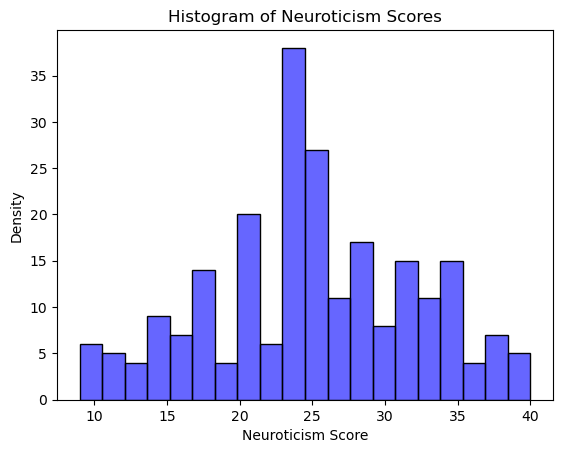

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram with KDE
sns.histplot(data_cleaned['PSYCH_big_five_inventory_neurotic_score'], bins=20, color='blue', alpha=0.6)

# Customize plot
plt.title("Histogram of Neuroticism Scores")
plt.xlabel("Neuroticism Score")
plt.ylabel("Density")

# Show the plot
plt.show()

In [35]:
selected_predictors_ee = [
    "NUTRITION_cooking_and_food_provisioning_action_scale_structure_score",
    "PSYCH_big_five_inventory_conscientious_score",
    "PSYCH_big_five_inventory_neurotic_score",
    "C(LONELY_dejong_emotional_loneliness_sub_scale_score_y_n)",     # Categorical predictor
]

formula_ee = f"Emotional_Eating_Scaled ~ {' + '.join(selected_predictors_ee)}"
model_ee = smf.ols(formula=formula_ee, data=data_cleaned).fit()
model_ee.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Emotional_Eating_Scaled   R-squared:                       0.177
Model:                                 OLS   Adj. R-squared:                  0.163
Method:                      Least Squares   F-statistic:                     12.29
Date:                     Thu, 28 Nov 2024   Prob (F-statistic):           4.56e-09
Time:                             12:32:12   Log-Likelihood:                -1087.6
No. Observations:                      233   AIC:                             2185.
Df Residuals:                          228   BIC:                             2202.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 45.9624     14.096      3.261      0.001      18.186      73.738
C(LONELY_dejong_emotional_loneliness_sub_scale_score_y_n)[T.Yes (1-3)]     9.8768      4.384      2.253      0.025       1.239      18.515
NUTRITION_cooking_and_food_provisioning_action_scale_structure_score      -2.9496      1.269     -2.324      0.021      -5.450      -0.449
PSYCH_big_five_inventory_conscientious_score                              -0.5841      0.273     -2.141      0.033      -1.122      -0.046
PSYCH_big_five_inventory_neurotic_score                                    0.9501      0.265      3.583      0.000       0.428       1.473
==============================================================================
Omnibus:                       11.392   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                5.513
Skew:                          -0.130   Prob(JB):                       0.0635
Kurtosis:                       2.293   Cond. No.                         341.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
data_cleaned.NUTRITION_cooking_and_food_provisioning_action_scale_structure_score.value_counts()

NUTRITION_cooking_and_food_provisioning_action_scale_structure_score
6.0    20
7.0    18
6.6    15
5.8    15
3.6    14
5.6    12
4.2    12
6.4    11
3.8    11
6.2    11
4.0     9
4.8     9
4.6     9
5.0     8
3.4     8
4.4     8
3.2     7
5.2     7
6.8     6
5.4     6
3.0     4
2.4     3
2.8     3
2.0     2
2.6     2
1.6     1
1.2     1
1.0     1
Name: count, dtype: int64

In [37]:
data_cleaned.PSYCH_big_five_inventory_conscientious_score.value_counts()

PSYCH_big_five_inventory_conscientious_score
30.0    18
31.0    16
27.0    14
34.0    14
32.0    13
37.0    12
26.0    11
33.0    11
36.0    10
38.0    10
29.0    10
23.0     9
35.0     8
25.0     8
28.0     8
42.0     7
41.0     7
43.0     6
22.0     6
45.0     5
40.0     5
20.0     5
24.0     5
39.0     4
44.0     3
21.0     2
18.0     2
14.0     1
16.0     1
15.0     1
19.0     1
Name: count, dtype: int64

In [38]:
data_cleaned.PSYCH_big_five_inventory_neurotic_score.value_counts()

PSYCH_big_five_inventory_neurotic_score
24.0    21
23.0    17
26.0    15
20.0    14
25.0    12
29.0    12
33.0    11
27.0    11
31.0     9
34.0     9
17.0     8
30.0     8
16.0     7
21.0     6
18.0     6
35.0     6
32.0     6
22.0     6
15.0     6
28.0     5
10.0     5
38.0     5
19.0     4
39.0     4
36.0     4
13.0     4
11.0     3
14.0     3
37.0     2
12.0     2
9.0      1
40.0     1
Name: count, dtype: int64

In [39]:
data_cleaned.LONELY_dejong_emotional_loneliness_sub_scale_score_y_n.value_counts()

LONELY_dejong_emotional_loneliness_sub_scale_score_y_n
Yes (1-3)    182
No (0)        51
Name: count, dtype: int64

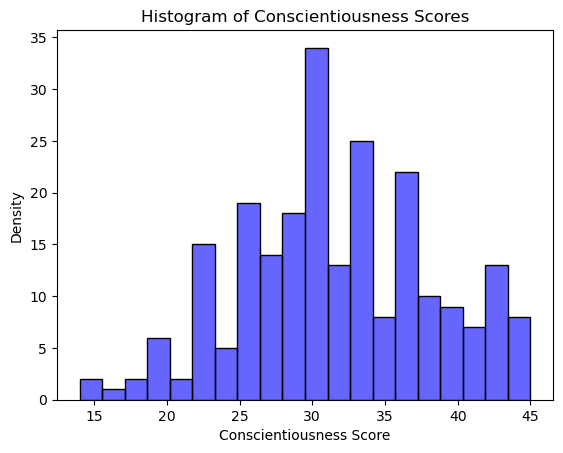

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram with KDE
sns.histplot(data_cleaned['PSYCH_big_five_inventory_conscientious_score'], bins=20, color='blue', alpha=0.6)

# Customize plot
plt.title("Histogram of Conscientiousness Scores")
plt.xlabel("Conscientiousness Score")
plt.ylabel("Density")

# Show the plot
plt.show()

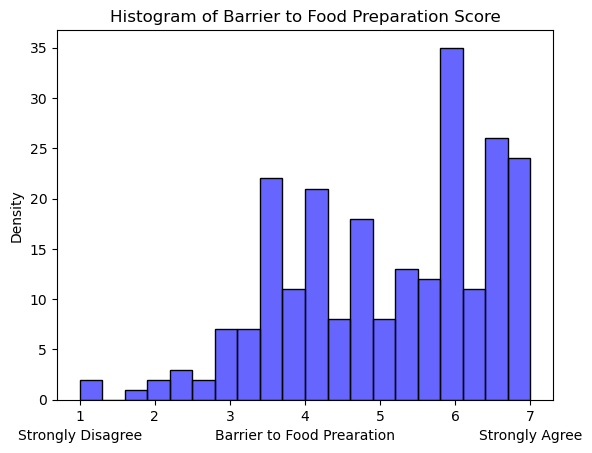

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram with KDE
sns.histplot(data_cleaned['NUTRITION_cooking_and_food_provisioning_action_scale_structure_score'], bins=20, color='blue', alpha=0.6)

# Customize plot
plt.title("Histogram of Barrier to Food Preparation Score")
plt.xlabel("Barrier to Food Prearation")
plt.ylabel("Density")

plt.text(data_cleaned['NUTRITION_cooking_and_food_provisioning_action_scale_structure_score'].min(), -4, "Strongly Disagree", ha='center', color='black')
plt.text(data_cleaned['NUTRITION_cooking_and_food_provisioning_action_scale_structure_score'].max(), -4, "Strongly Agree", ha='center', color='black')

# Show the plot
plt.show()